# Testing GeoPandas overlaps from two times

In [2]:
from shapely import geometry
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import fiona             # a read-write library for shapefiles
import os,json           # json just a convenient way to dump some numbers (contour levels)
#from descartes.patch import PolygonPatch

from glob import glob
import xarray as xr
#import dask.array as da

import geopandas as gp

# A function to return a GeoDataFrame of polygons 

In [120]:
# loop over contour collections (and polygons in each collection)
# store in polylist  
def gdf_from_contours(lon,lat,tqv,conlevel):
    
    levels = [conlevel, 9e9]
    cs = plt.contourf(lon,lat,tqv,levels)
# create lookup table for levels
    lvl_lookup = dict(zip(cs.collections, cs.levels))
    
    zvalues, polylist  = [], []
#    i=0
    for col in cs.collections:
        z=lvl_lookup[col] # the value of this level
        for contour_path in col.get_paths():
#        print('contour path: ',i); i = i+1
        # create the polygon for this level
            for ncp,cp in enumerate(contour_path.to_polygons()):
#            print('   ncp: ', ncp)
                lons = np.array(cp)[:,0]
                lats = np.array(cp)[:,1]
                new_shape = geometry.Polygon([(i[0], i[1]) for i in zip(lons,lats)])            
                if ncp == 0:
                    poly = new_shape # first shape
                else:
                    poly = poly.difference(new_shape) # Remove the holes

            polylist.append(poly)
            zvalues.append(z)
        
        gdf = gp.GeoDataFrame(geometry=polylist)
        gdf['tqv_values']=zvalues
        gdf['area']=gdf.area
        return(gdf)

# Open the virtual (time series) dataset in xarray 

In [121]:
files = glob('MERRA2*.nc') #+glob('*2015*')+glob('*2016*')+glob('*2017*')+glob('*2018*') # selecting 2014-2018
cwv_data = xr.open_mfdataset(files) # merging data files in one
cwv_WEIO = cwv_data.sel(lat=slice(-30,30),lon=slice(30,90))

# Grab the later (destined) time level 

,geometry,tqv_values,area
0,"POLYGON ((58.75000 -10.51604, 58.77544 -10.500...",55.0,42.595260
1,"POLYGON ((88.75000 -9.87128, 88.16430 -9.50000...",55.0,258.886779
2,"POLYGON ((61.87500 -8.04756, 61.98258 -8.00000...",55.0,0.036614
3,"POLYGON ((62.50000 -4.05860, 62.57154 -4.00000...",55.0,0.706446
4,"POLYGON ((53.12500 -1.14258, 53.15765 -1.00000...",55.0,0.813496
5,"POLYGON ((65.62500 2.48853, 65.69610 2.50000, ...",55.0,0.001901
6,"POLYGON ((71.25000 4.45331, 71.87500 4.29712, ...",55.0,0.978947
7,"POLYGON ((56.87500 5.85807, 57.50000 5.96315, ...",55.0,0.549771
8,"POLYGON ((49.37500 6.95115, 50.00000 6.96510, ...",55.0,0.208567
9,"POLYGON ((33.75000 7.47262, 33.80174 7.50000, ...",55.0,0.813457


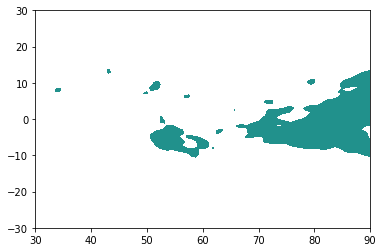

In [122]:
lon = cwv_WEIO.lon
lat = cwv_WEIO.lat
tqv = cwv_WEIO.TQV[3].values

gdf_destined = gdf_from_contours(lon,lat,tqv,55.)
gdf_destined

,geometry,tqv_values,area
0,"POLYGON ((89.64387 -11.50000, 89.37500 -11.387...",55.0,187.356451
1,"POLYGON ((53.12500 -10.56109, 53.47156 -10.500...",55.0,1.269263
2,"POLYGON ((53.75000 -8.70070, 54.22038 -8.50000...",55.0,14.351828
3,"POLYGON ((59.37500 -7.72917, 59.70920 -7.50000...",55.0,10.741246
4,"POLYGON ((56.25000 -4.56165, 56.87500 -4.89642...",55.0,1.522988
5,"POLYGON ((55.00000 -4.18653, 55.32342 -4.00000...",55.0,0.428718
6,"POLYGON ((64.37500 -3.14660, 64.93152 -3.00000...",55.0,0.105836
7,"POLYGON ((65.00000 1.92670, 65.62500 1.71592, ...",55.0,2.643069
8,"POLYGON ((54.37500 3.42998, 55.00000 3.12328, ...",55.0,19.917211
9,"POLYGON ((30.62500 3.96007, 30.72201 4.00000, ...",55.0,0.004781


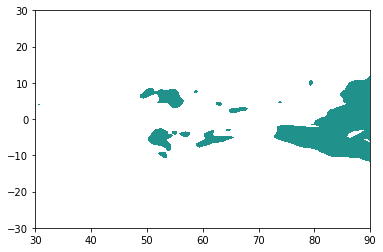

In [123]:
tqv = cwv_WEIO.TQV[23].values

gdf_destined = gdf_from_contours(lon,lat,tqv,55.)
gdf_destined

# Grab the present time level

,geometry,tqv_values,area
0,"POLYGON ((88.12500 -10.02020, 88.24098 -10.000...",55.0,225.984094
1,"POLYGON ((90.00000 -10.01531, 90.00000 -10.000...",55.0,0.186753
2,"POLYGON ((57.50000 -9.53604, 57.52261 -9.50000...",55.0,0.004809
3,"POLYGON ((56.87500 -9.09116, 57.25765 -9.00000...",55.0,28.002388
4,"POLYGON ((58.75000 -7.15710, 59.37500 -7.25306...",55.0,2.551614
5,"POLYGON ((56.87500 -5.01000, 57.03445 -5.00000...",55.0,0.001473
6,"POLYGON ((68.75000 -0.09805, 68.87256 -0.00000...",55.0,3.462117
7,"POLYGON ((65.62500 1.87057, 66.25000 1.99674, ...",55.0,1.052490
8,"POLYGON ((72.50000 3.93674, 73.12500 3.99034, ...",55.0,2.237743
9,"POLYGON ((31.87500 6.72584, 32.50000 6.85987, ...",55.0,2.494844


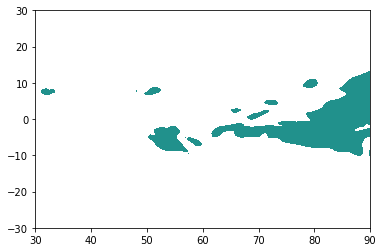

In [124]:
tqv = cwv_WEIO.TQV[10].values
gdf_now = gdf_from_contours(lon,lat,tqv,55.)
gdf_now

# Some basic plots 

<AxesSubplot:>

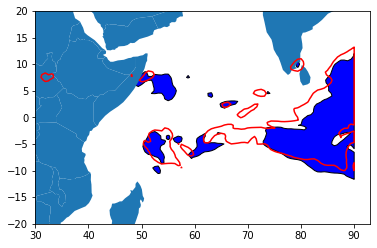

In [125]:
#https://geopandas.org/docs/user_guide/mapping.html
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(30, 93)
ax.set_ylim(-20,20)

gdf_destined.plot(ax=ax,color='blue', edgecolor='black')
gdf_now.boundary.plot(ax=ax, color='red')

path = gp.datasets.get_path('naturalearth_lowres')
mapdf = gp.read_file(path)
mapdf.plot(ax=ax)

# Overlaps at last!! 

In [126]:
gdf_destined.geometry

0     POLYGON ((89.64387 -11.50000, 89.37500 -11.387...
1     POLYGON ((53.12500 -10.56109, 53.47156 -10.500...
2     POLYGON ((53.75000 -8.70070, 54.22038 -8.50000...
3     POLYGON ((59.37500 -7.72917, 59.70920 -7.50000...
4     POLYGON ((56.25000 -4.56165, 56.87500 -4.89642...
5     POLYGON ((55.00000 -4.18653, 55.32342 -4.00000...
6     POLYGON ((64.37500 -3.14660, 64.93152 -3.00000...
7     POLYGON ((65.00000 1.92670, 65.62500 1.71592, ...
8     POLYGON ((54.37500 3.42998, 55.00000 3.12328, ...
9     POLYGON ((30.62500 3.96007, 30.72201 4.00000, ...
10    POLYGON ((63.12500 3.75125, 63.38016 4.00000, ...
11    POLYGON ((73.75000 4.43699, 74.15225 4.50000, ...
12    POLYGON ((58.75000 7.38439, 59.02398 7.50000, ...
13    POLYGON ((79.37500 9.39082, 79.51906 9.50000, ...
Name: geometry, dtype: geometry

In [152]:
# I tested the order here, destined and now are correct.
# but indices arrays are always the same size 
indices_destined, indices_now = gdf_now[(gdf_now.area>0)].sindex.query_bulk(gdf_destined.geometry, predicate='overlaps') # index numbers of overlaps
indices_destined, indices_now

(array([0, 2, 3, 3, 6, 7, 8]), array([ 0,  3,  4,  0,  0,  7, 10]))

In [153]:
bigboy = gdf_now[(gdf_now.area>0)]
bigboy.geometry

0     POLYGON ((88.12500 -10.02020, 88.24098 -10.000...
1     POLYGON ((90.00000 -10.01531, 90.00000 -10.000...
2     POLYGON ((57.50000 -9.53604, 57.52261 -9.50000...
3     POLYGON ((56.87500 -9.09116, 57.25765 -9.00000...
4     POLYGON ((58.75000 -7.15710, 59.37500 -7.25306...
5     POLYGON ((56.87500 -5.01000, 57.03445 -5.00000...
6     POLYGON ((68.75000 -0.09805, 68.87256 -0.00000...
7     POLYGON ((65.62500 1.87057, 66.25000 1.99674, ...
8     POLYGON ((72.50000 3.93674, 73.12500 3.99034, ...
9     POLYGON ((31.87500 6.72584, 32.50000 6.85987, ...
10    POLYGON ((50.00000 6.66252, 50.62500 6.79671, ...
11    POLYGON ((48.12500 7.57841, 48.15454 8.00000, ...
12    POLYGON ((78.75000 8.77880, 79.37500 8.66743, ...
Name: geometry, dtype: geometry

In [154]:
gdf_destined.sindex.query_bulk(bigboy.geometry, predicate='overlaps')

array([[ 0,  0,  0,  3,  4,  7, 10],
       [ 3,  6,  0,  2,  3,  7,  8]])